<a href="https://colab.research.google.com/github/nidhiss29/aiml/blob/main/ANN_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.
There are in total 50000 train images and 10000 test images.

Importing tensorflow and other modules like numpy. If the module is not present then you can download it using pip install tensorflow on the command prompt (for windows) or if you are using a jupyter notebook then simply type !pip install tensorflow in the cell and run it in order to download the module.
    

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
len(label)

10

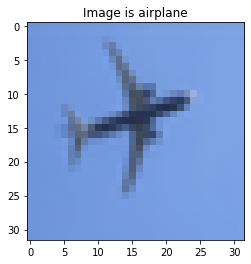

In [ ]:
import matplotlib.pyplot as plt
i = np.random.randint(1,50000)
op = label[y_train[i][0]]
plt.imshow(x_train[i])
plt.title(f'Image is {op}')
plt.show()

In [ ]:
x_train =x_train/255
x_test = x_test/255

In [ ]:
32*32*3

3072

In [ ]:
# Build a ANN model

ann = tf.keras.Sequential()
ann.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
ann.add(tf.keras.layers.Dense(2048,activation='relu'))
ann.add(tf.keras.layers.Dense(1024,activation='relu'))
ann.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 8,401,930
Trainable params: 8,401,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
a=ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3737 - accuracy: 0.5075 - val_loss: 1.4935 - val_accuracy: 0.4782
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3587 - accuracy: 0.5123 - val_loss: 1.4798 - val_accuracy: 0.4793
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3456 - accuracy: 0.5184 - val_loss: 1.4545 - val_accuracy: 0.4892
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3307 - accuracy: 0.5233 - val_loss: 1.5021 - val_accuracy: 0.4756
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3180 - accuracy: 0.5289 - val_loss: 1.4776 - val_accuracy: 0.4857
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3129 - accuracy: 0.5296 - val_loss: 1.4784 - val_accuracy: 0.4858
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2924 - accuracy: 0.5366 - val_loss: 1.4837 - val_accuracy:

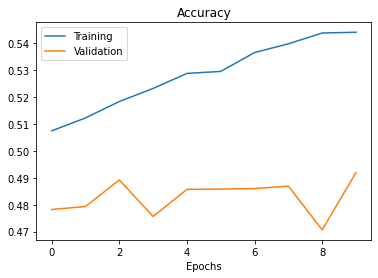

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');

In [ ]:
# Building a CNN model

In [ ]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(64,activation='relu'))
cnn1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 512)              

In [ ]:
cnn1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
h=cnn1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6436 - accuracy: 0.7730 - val_loss: 0.9176 - val_accuracy: 0.7002
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6141 - accuracy: 0.7836 - val_loss: 0.9148 - val_accuracy: 0.6982
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5894 - accuracy: 0.7914 - val_loss: 0.8827 - val_accuracy: 0.7044
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5617 - accuracy: 0.8025 - val_loss: 0.9181 - val_accuracy: 0.7012
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5367 - accuracy: 0.8103 - val_loss: 0.9200 - val_accuracy: 0.7113
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5125 - accuracy: 0.8186 - val_loss: 1.0298 - val_accuracy: 0.6812
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4979 - accuracy: 0.8252 - val_loss: 0.9503 - val_accuracy:

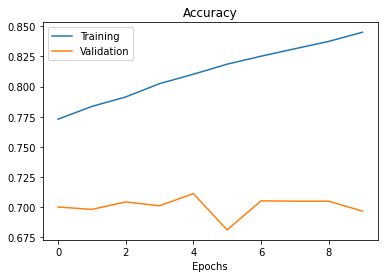

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');